# **Predicting Mortgage Backed Securities Prepayment Risk Prediction**

# **Third Task : Feature Engineering.**

*  Feature Selection
*  Handling outliers
*  Encoding
*  Feature Scaling







## Importing Data & Needed Libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib
warnings.filterwarnings("always")

%matplotlib inline

In [164]:
data = pd.read_csv('LoanExport.csv')
data.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-164-674adbca6759>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


## Data Preprocessing & EDA

In [3]:
data.isnull().any()

CreditScore           False
FirstPaymentDate      False
FirstTimeHomebuyer    False
MaturityDate          False
MSA                   False
MIP                   False
Units                 False
Occupancy             False
OCLTV                 False
DTI                   False
OrigUPB               False
LTV                   False
OrigInterestRate      False
Channel               False
PPM                   False
ProductType           False
PropertyState         False
PropertyType          False
PostalCode            False
LoanSeqNum            False
LoanPurpose           False
OrigLoanTerm          False
NumBorrowers          False
SellerName             True
ServicerName          False
EverDelinquent        False
MonthsDelinquent      False
MonthsInRepayment     False
dtype: bool

In [4]:
data["SellerName"].isnull().sum()

24994

In [5]:
data["SellerName"]=data["SellerName"].fillna("Not Known")
data["SellerName"].isnull().any()

False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [7]:
data.shape

(291451, 28)

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(291451, 28)

So, we dont have any duplicate data

In [10]:
data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [11]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [12]:
data["CreditScore"].unique()

array([  0, 335, 342, 363, 366, 370, 375, 391, 396, 445, 462, 466, 471,
       476, 477, 478, 479, 481, 482, 483, 485, 486, 487, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
       596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 64

In [13]:
data["FirstPaymentDate"]=pd.to_datetime(data["FirstPaymentDate"], format="%Y%m").dt.to_period("M")
data["MaturityDate"]=pd.to_datetime(data["MaturityDate"], format="%Y%m").dt.to_period("M")
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [14]:
data["FirstPaymentDate"].dtypes

period[M]

In [15]:
data["FirstTimeHomebuyer"].unique()
#X-->not available

array(['N', 'X', 'Y'], dtype=object)

In [16]:
data["FirstTimeHomebuyer"].replace("X",data["FirstTimeHomebuyer"].mode()[0],inplace=True)
data["FirstTimeHomebuyer"].unique()

array(['N', 'Y'], dtype=object)

In [17]:
data["Units"].unique()

array([1, 2, 4, 3, 0])

msa??

In [18]:
data["Occupancy"].unique()
#O primary occupancy
#I investment
#S secondary

array(['O', 'I', 'S'], dtype=object)

In [19]:
data["DTI"].unique()
#no 999 no nans

array([27, 17, 16, 14, 18, 40, 21, 20, 38, 19, 23, 45, 28, 29, 15, 43, 25,
       24, 26, 35, 46, 39, 33, 48, 30, 31, 22, 56, 32, 12,  6, 37, 36, 42,
       34, 11, 41,  8, 44, 55,  0, 13, 53, 10,  9, 51,  7, 47, 65, 54,  2,
       57,  5,  3,  4, 50, 59, 49, 52, 64, 60, 58, 62,  1, 61, 63])

In [20]:
data["LTV"].unique()
#no 999

array([ 89,  73,  75,  76,  78,  90,  72,  95,  80,  77,  85,  93,  70,
        74,  79,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  86,  50,
        45,  71,  61,  42,  59,  57,  48,  51,  67,  81,  66,  82,  88,
        26,  30,  24,  34,  37,  65,  31,   7,  38,  39,  16,  41,  33,
        18,  22,  35,  92,  40,  56,  29,  43,  28,  47, 100,  49,  25,
        98,  27,  13,  10,  23,  20,  15,  21, 103,  14,  17,  19,   8,
         0,  99,  12,   6,  11,   9])

In [21]:
data["OrigInterestRate"].unique()

array([ 6.75 ,  6.5  ,  6.875,  7.125,  7.   ,  7.25 ,  6.625,  7.75 ,
        7.2  ,  7.5  ,  7.625,  7.875,  6.25 ,  8.125,  7.15 ,  7.375,
        6.375,  8.75 ,  7.1  ,  8.5  ,  7.05 ,  6.95 ,  8.   ,  6.   ,
        8.625,  8.375,  6.125,  5.75 ,  5.875,  8.25 ,  7.18 ,  5.125,
        5.25 ,  8.99 ,  5.625,  9.   ,  9.375,  5.   ,  9.125,  6.99 ,
        5.375,  8.365,  8.875,  8.825,  6.975,  7.3  ,  7.313,  9.625,
        9.5  ,  9.25 ,  7.85 ,  8.695,  4.875,  7.775,  7.29 ,  7.405,
        9.75 ,  7.13 ,  5.99 ,  6.999,  7.055,  7.09 ,  6.785,  7.08 ,
        7.025,  7.7  ,  7.58 , 10.5  ,  7.55 ,  7.445,  9.875,  6.9  ,
        6.85 ,  6.925,  8.37 ,  7.095,  7.19 ,  8.85 ,  7.456,  7.675,
        9.675,  7.475,  8.04 ,  7.4  ,  7.22 ,  7.17 ,  8.7  ,  7.301,
        8.9  , 10.   ,  5.5  ,  6.62 ,  6.7  ,  7.325, 10.375,  4.75 ,
        6.6  ,  7.8  ,  7.333, 10.85 ,  7.185,  7.99 ,  7.245, 11.5  ,
        6.94 ,  6.87 ,  7.65 ,  7.312,  7.28 ,  7.39 ,  7.07 ,  6.55 ,
      

In [22]:
((data["OrigInterestRate"] < 0) | (data["OrigInterestRate"] > 25)).any()
#no nans

False

In [23]:
data["Channel"].unique()
#no nans no 9

array(['T', 'R', 'C', 'B'], dtype=object)

In [24]:
data["PPM"].unique()

array(['N', 'X', 'Y'], dtype=object)

In [25]:
data["ProductType"].unique()

array(['FRM  '], dtype=object)

In [26]:
data["PropertyState"].unique()

array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'MS', 'NY', 'WA', 'AR', 'VA',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA',
       'NM', 'NV', 'VT', 'OH', 'NE', 'HI', 'ID', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

In [27]:
data["PropertyType"].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

In [28]:
(data["PropertyType"]=='X ').sum()
#22 not available

22

In [29]:
data["LoanPurpose"].unique()

array(['P', 'N', 'C'], dtype=object)

In [30]:
data["NumBorrowers"].unique()

array(['2', '1', 'X '], dtype=object)

In [31]:
(data["NumBorrowers"]=="X ").sum()
#339 unavailable

339

In [32]:
data["EverDelinquent"].unique()

array([0, 1])

In [33]:
data.set_index("LoanSeqNum",inplace=True)
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [34]:
data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                object
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
Channel                  object
PPM                      object
ProductType              object
PropertyState            object
PropertyType             object
PostalCode               object
LoanPurpose              object
OrigLoanTerm              int64
NumBorrowers             object
SellerName               object
ServicerName             object
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
dtype: object

#**Data Encoding - Label Encoding**

In [35]:
data_encoded=data.copy()

In [36]:
label_encoder = LabelEncoder()
data_encoded["FirstTimeHomebuyer"] = label_encoder.fit_transform(data_encoded["FirstTimeHomebuyer"])
data_encoded.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,0,2029-01,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,0,2029-01,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,0,2029-01,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,0,2029-01,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,0,2029-01,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [37]:
data_encoded["Occupancy"] = label_encoder.fit_transform(data_encoded["Occupancy"])
data_encoded.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,0,2029-01,16974,25,1,1,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,0,2029-01,19740,0,1,1,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,0,2029-01,29940,0,1,1,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,0,2029-01,31084,0,1,1,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,0,2029-01,35644,0,1,1,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [38]:
one_hot_encoded = pd.get_dummies(data["Channel"], prefix="Channel")
data_encoded = pd.concat([data_encoded, one_hot_encoded], axis=1)
data_encoded.drop("Channel",axis=1,inplace=True)
data_encoded.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Channel_B,Channel_C,Channel_R,Channel_T
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,0,2029-01,16974,25,1,1,89,27,...,2,FL,WASHINGTONMUTUALBANK,0,0,52,0,0,0,1
F199Q1015092,0,1999-02,0,2029-01,19740,0,1,1,73,17,...,1,FT,CHASEHOMEFINANCELLC,0,0,144,0,0,1,0
F199Q1266886,0,1999-02,0,2029-01,29940,0,1,1,75,16,...,2,FL,WASHINGTONMUTUALBANK,0,0,67,0,0,0,1
F199Q1178167,0,1999-02,0,2029-01,31084,0,1,1,76,14,...,2,GM,GMACMTGECORP,0,0,35,0,0,1,0
F199Q1178517,0,1999-02,0,2029-01,35644,0,1,1,78,18,...,2,GM,GMACMTGECORP,0,0,54,0,0,1,0


In [39]:
one_hot_encoded = pd.get_dummies(data["PPM"], prefix="PPM")
data_encoded = pd.concat([data_encoded, one_hot_encoded], axis=1)
data_encoded.drop("PPM",axis=1,inplace=True)

In [40]:
data_encoded.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Channel_B,Channel_C,Channel_R,Channel_T,PPM_N,PPM_X,PPM_Y
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,0,2029-01,16974,25,1,1,89,27,...,0,0,52,0,0,0,1,1,0,0
F199Q1015092,0,1999-02,0,2029-01,19740,0,1,1,73,17,...,0,0,144,0,0,1,0,1,0,0
F199Q1266886,0,1999-02,0,2029-01,29940,0,1,1,75,16,...,0,0,67,0,0,0,1,1,0,0
F199Q1178167,0,1999-02,0,2029-01,31084,0,1,1,76,14,...,0,0,35,0,0,1,0,1,0,0
F199Q1178517,0,1999-02,0,2029-01,35644,0,1,1,78,18,...,0,0,54,0,0,1,0,1,0,0


In [41]:
data_encoded.drop("ProductType",axis=1,inplace=True)
#all values in this column are same

In [42]:
data["PropertyType"].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

In [43]:
one_hot_encoded = pd.get_dummies(data["PropertyType"], prefix="PropertyType")
data_encoded = pd.concat([data_encoded, one_hot_encoded], axis=1)
data_encoded.drop("PropertyType",axis=1,inplace=True)

In [44]:
data_encoded["PostalCode"] = label_encoder.fit_transform(data_encoded["PostalCode"])

In [45]:
data_encoded["LoanPurpose"] = label_encoder.fit_transform(data_encoded["LoanPurpose"])

In [46]:
data_encoded["NumBorrowers"] = data_encoded["NumBorrowers"].replace("X ", 99)

In [47]:
data_encoded["NumBorrowers"] = data_encoded["NumBorrowers"].astype(int)

In [48]:
data["SellerName"].unique()

array(['FL', 'FT', 'GM', 'Ot', 'RE', 'NO', 'ST', 'CR', 'CH', 'FI', 'HO',
       'PR', 'Not Known', 'PN', 'WA', 'BA', 'G ', 'OL', 'AC', 'CO', 'BI'],
      dtype=object)

In [49]:
data_encoded["SellerName"] = label_encoder.fit_transform(data_encoded["SellerName"])

In [50]:
data_encoded["ServicerName"] = label_encoder.fit_transform(data_encoded["ServicerName"])

In [51]:
data_encoded.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,0,2029-01,16974,25,1,1,89,27,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,0,1999-02,0,2029-01,19740,0,1,1,73,17,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,0,1999-02,0,2029-01,29940,0,1,1,75,16,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,0,1999-02,0,2029-01,31084,0,1,1,76,14,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,0,1999-02,0,2029-01,35644,0,1,1,78,18,...,1,0,0,0,0,0,0,0,1,0


In [52]:
data_encoded["PropertyState"] = label_encoder.fit_transform(data["PropertyState"])

In [53]:
data_encoded.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'PropertyState', 'PostalCode', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment', 'Channel_B',
       'Channel_C', 'Channel_R', 'Channel_T', 'PPM_N', 'PPM_X', 'PPM_Y',
       'PropertyType_CO', 'PropertyType_CP', 'PropertyType_LH',
       'PropertyType_MH', 'PropertyType_PU', 'PropertyType_SF',
       'PropertyType_X '],
      dtype='object')

In [54]:
data_encoded.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer        int64
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                 int64
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
PropertyState             int64
PostalCode                int64
LoanPurpose               int64
OrigLoanTerm              int64
NumBorrowers              int64
SellerName                int64
ServicerName              int64
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
Channel_B                 uint8
Channel_C                 uint8
Channel_R                 uint8
Channel_T                 uint8
PPM_N                     uint8
PPM_X                     uint8
PPM_Y                     uint8
PropertyType_CO           uint8
Property

In [55]:
data_encoded["MSA"] = label_encoder.fit_transform(data["MSA"])

In [56]:
data_encoded.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,0,2029-01,68,25,1,1,89,27,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,0,1999-02,0,2029-01,95,0,1,1,73,17,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,0,1999-02,0,2029-01,198,0,1,1,75,16,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,0,1999-02,0,2029-01,210,0,1,1,76,14,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,0,1999-02,0,2029-01,250,0,1,1,78,18,...,1,0,0,0,0,0,0,0,1,0


In [57]:
data_encoded.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer        int64
MaturityDate          period[M]
MSA                       int64
MIP                       int64
Units                     int64
Occupancy                 int64
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
PropertyState             int64
PostalCode                int64
LoanPurpose               int64
OrigLoanTerm              int64
NumBorrowers              int64
SellerName                int64
ServicerName              int64
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
Channel_B                 uint8
Channel_C                 uint8
Channel_R                 uint8
Channel_T                 uint8
PPM_N                     uint8
PPM_X                     uint8
PPM_Y                     uint8
PropertyType_CO           uint8
Property

In [58]:
data["EverDelinquent"].unique()

array([0, 1])

In [59]:
# data["EverDeliquent"] an be used as the target label ig
#data_encoded["Target"]=data["EverDelinquent"]

In [60]:
data_encoded.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,0,2029-01,68,25,1,1,89,27,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,0,1999-02,0,2029-01,95,0,1,1,73,17,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,0,1999-02,0,2029-01,198,0,1,1,75,16,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,0,1999-02,0,2029-01,210,0,1,1,76,14,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,0,1999-02,0,2029-01,250,0,1,1,78,18,...,1,0,0,0,0,0,0,0,1,0


In [61]:
data_encoded["EverDelinquent"].value_counts()
#imbalance data

0    233788
1     57663
Name: EverDelinquent, dtype: int64

## **EXPLORATORY DATA ANALYSIS**

In [62]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [63]:
conditions = [
    (data["CreditScore"] >= 0) & (data["CreditScore"] < 650),
    (data["CreditScore"] >= 650) & (data["CreditScore"] < 700),
    (data["CreditScore"] >= 700) & (data["CreditScore"] < 750),
    (data["CreditScore"] >= 750) & (data["CreditScore"] < 900)
]

choices = ["Poor", "Fair", "Good", "Excellent"]

data["CreditScore"] = np.select(conditions, choices, default=data["CreditScore"])

In [64]:
data["CreditScore"].unique()

array(['Poor', 'Fair', 'Good', 'Excellent'], dtype=object)

In [65]:
data["LTV"].unique()
#let us consider 0 -- not available as high ltv (only one value)

array([ 89,  73,  75,  76,  78,  90,  72,  95,  80,  77,  85,  93,  70,
        74,  79,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  86,  50,
        45,  71,  61,  42,  59,  57,  48,  51,  67,  81,  66,  82,  88,
        26,  30,  24,  34,  37,  65,  31,   7,  38,  39,  16,  41,  33,
        18,  22,  35,  92,  40,  56,  29,  43,  28,  47, 100,  49,  25,
        98,  27,  13,  10,  23,  20,  15,  21, 103,  14,  17,  19,   8,
         0,  99,  12,   6,  11,   9])

In [66]:
conditions = [
    (data["LTV"] >= 1) & (data["LTV"] < 60),     # Low LTV
    (data["LTV"] >= 60) & (data["LTV"] < 80),    # Medium LTV
    (data["LTV"] >= 80) | (data["LTV"]==0)  # High LTV
]

choices = ["Low", "Medium", "High"]

data["LTV"] = np.select(conditions, choices,default=data["LTV"])
data["LTV"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [67]:
data["LTV"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [68]:
data["FirstTimeHomebuyer"].unique()

array(['N', 'Y'], dtype=object)

In [69]:
data["MonthsInRepayment"].unique()

array([ 52, 144,  67,  35,  54,  42,  44, 145,  64, 212,  37,  47,  53,
        55,  66,  26,  38,  36,  39,  40,  11, 176,  46, 197, 210,  56,
       118,  63,  24,  28,  91,  50,  22, 211, 199,  23,  30, 125,  41,
        76,  49,  18,  19,  43,  60,  83,  95,  29,  45,  13,   6,  48,
        62,  14,  15, 111,  51,  17,  75,  58,  27,  10,  31, 133, 165,
       156,  33,  68, 205,  57, 159,  81, 191, 194, 114,  59, 100, 134,
        74,   9,  34,  77, 170, 122,  69,  72, 206, 148, 153, 101, 180,
         8,  32,   5, 207,   7, 128,  71,  65,  79, 174, 195, 151, 149,
        21,  12, 137, 130,  70, 173, 166,  61, 160,  20, 178,   3, 147,
         2, 164, 139, 108,  92, 209, 102,  87,  94,  73, 123,  16, 142,
         1, 172, 109, 141, 175, 103, 168, 155, 177, 158, 138,  25, 110,
        98,  84, 208, 188, 106, 112, 121, 136, 179,   4, 154, 161, 157,
       150,  80, 183,  93, 143, 162, 126,  89, 184,  82, 117, 107, 193,
        85, 124, 192,  78, 169, 104, 131, 140, 163, 182, 132, 13

In [70]:
conditions = [
    (data["MonthsInRepayment"] >= 0) & (data["MonthsInRepayment"] < 48),
    (data["MonthsInRepayment"] >= 48) & (data["MonthsInRepayment"] < 96),
    (data["MonthsInRepayment"] >= 96) & (data["MonthsInRepayment"] < 144),
    (data["MonthsInRepayment"] >= 144) & (data["MonthsInRepayment"] < 192),
    (data["MonthsInRepayment"] >= 192) & (data["MonthsInRepayment"] < 240)
]

choices = ["Quart1", "Quart2", "Quart3", "Quart4","Quart5"]

data["MonthsInRepayment"] = np.select(conditions, choices, default=data["MonthsInRepayment"])

In [71]:
data["MonthsInRepayment"].unique()

array(['Quart2', 'Quart4', 'Quart1', 'Quart5', 'Quart3'], dtype=object)

# **LABEL ENCODING**

FOR THE COLUMNS

1. CREDIT SCORE
2. LTV
3. MONTHS IN REPAYMENT  


In [72]:
data_encoded["CreditScore"] = label_encoder.fit_transform(data["CreditScore"])

In [73]:
data_encoded["CreditScore"].unique()

array([3, 1, 2, 0])

In [74]:
data_encoded["LTV"]=label_encoder.fit_transform(data["LTV"])
data_encoded["LTV"].unique()

array([0, 2, 1])

In [75]:
data_encoded["MonthsInRepayment"] = data["MonthsInRepayment"].map({"Quart1": 0, "Quart2": 1, "Quart3": 2, "Quart4": 3,"Quart5":4})
data_encoded["MonthsInRepayment"].unique()

array([1, 3, 0, 4, 2])

<Axes: xlabel='CreditScore', ylabel='count'>

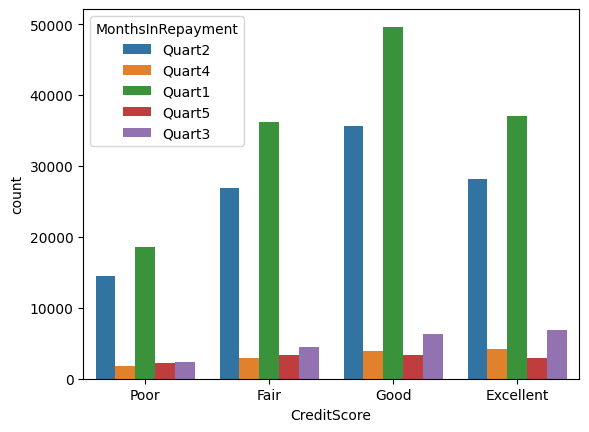

In [76]:
#credit score increases monthsinrepayment should increate
sns.countplot(x="CreditScore",hue="MonthsInRepayment",data=data)

<Axes: xlabel='CreditScore', ylabel='count'>

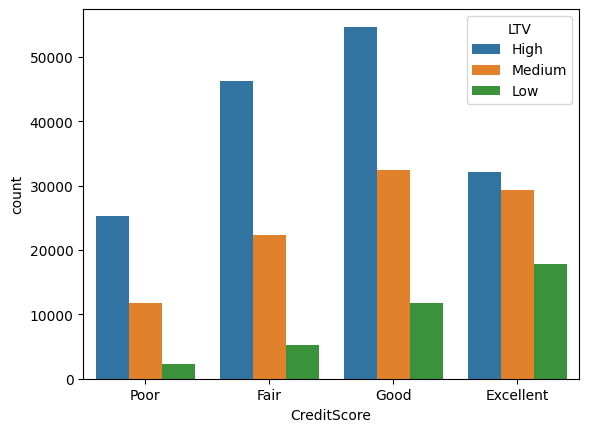

In [77]:
sns.countplot(x="CreditScore",hue="LTV",data=data)
#excellent credit score have considerable people with low LTV

# **UNIVARIATE ANALYSIS**

In [78]:
data_encoded.describe()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,...,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,1.337226,0.100470,230.144776,9.216685,1.026022,0.992630,76.960529,30.033453,124940.387921,0.785892,...,0.968001,0.018545,0.013453,0.062103,0.000247,0.000360,0.002481,0.094376,0.840357,0.000075
std,1.018347,0.300626,122.640635,12.648273,0.202986,0.229152,15.236154,13.203974,53657.440624,0.909120,...,0.175996,0.134912,0.115206,0.241343,0.015716,0.018977,0.049745,0.292352,0.366275,0.008688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,104.000000,0.000000,1.000000,1.000000,70.000000,22.000000,83000.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,250.000000,0.000000,1.000000,1.000000,80.000000,31.000000,117000.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,0.000000,330.000000,25.000000,1.000000,1.000000,90.000000,39.000000,160000.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,1.000000,391.000000,55.000000,4.000000,2.000000,110.000000,65.000000,497000.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
data_encoded.describe(include="period[M]")

,FirstPaymentDate,MaturityDate
count,291451,291451
unique,66,96
top,1999-05,2029-04
freq,104071,104210


<ipython-input-80-f7d8097addcf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_encoded["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

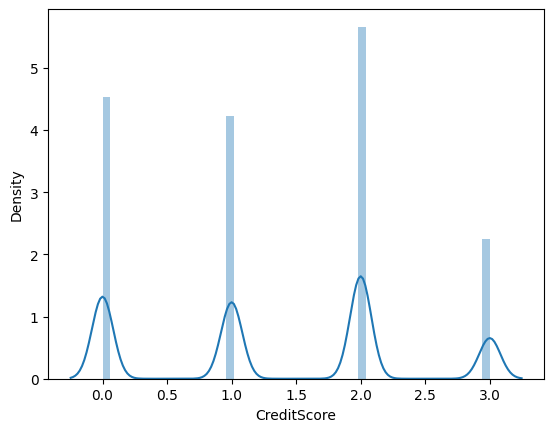

In [80]:
#Credit score
sns.distplot(data_encoded["CreditScore"])
#most of the values lie between 600 and 800 which implies that most of the people are elible for getting loan

<Axes: >

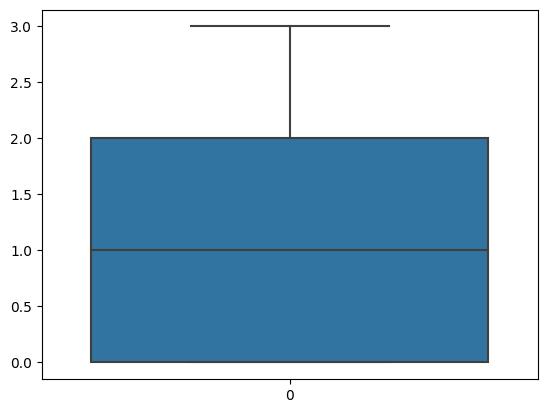

In [81]:
sns.boxplot(data_encoded["CreditScore"])
# The outliers here give a picture of people who are not eligible for getting loan.

<Axes: xlabel='FirstTimeHomebuyer', ylabel='count'>

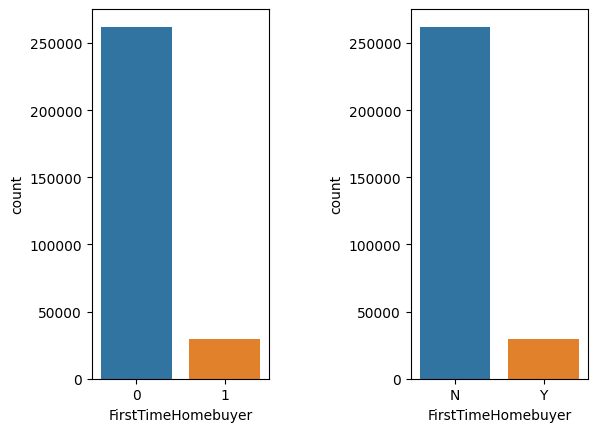

In [82]:
grid=plt.GridSpec(1,2,wspace=0.8)
plt.subplot(grid[0])
sns.countplot(x="FirstTimeHomebuyer", data=data_encoded)
plt.subplot(grid[1])
sns.countplot(x="FirstTimeHomebuyer", data=data)

In [83]:
data["MSA"].value_counts()
#We'll preserve the missing values in this column

X        39100
31084     9338
16974     8771
12060     6985
47644     6673
         ...  
21940        3
49500        2
25020        1
10380        1
32420        1
Name: MSA, Length: 392, dtype: int64

<ipython-input-84-3e5a42debbc8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['MSA'] != 'X    ']['MSA'])


<Axes: xlabel='MSA', ylabel='Density'>

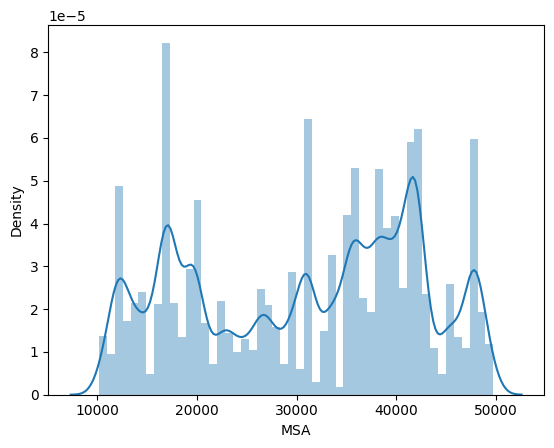

In [84]:
sns.distplot(data[data['MSA'] != 'X    ']['MSA'])

<Axes: xlabel='MIP', ylabel='Density'>

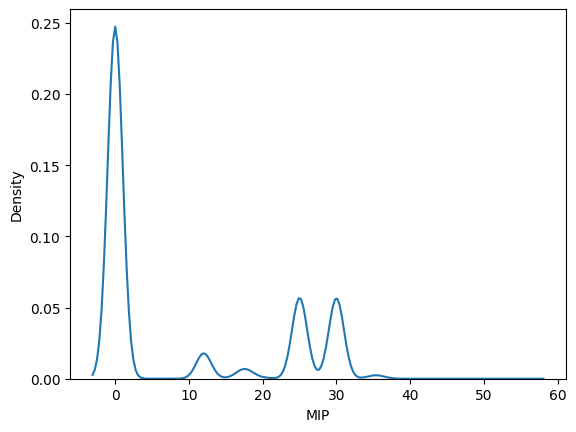

In [85]:
sns.kdeplot(x="MIP",data=data)

<Axes: xlabel='Units', ylabel='count'>

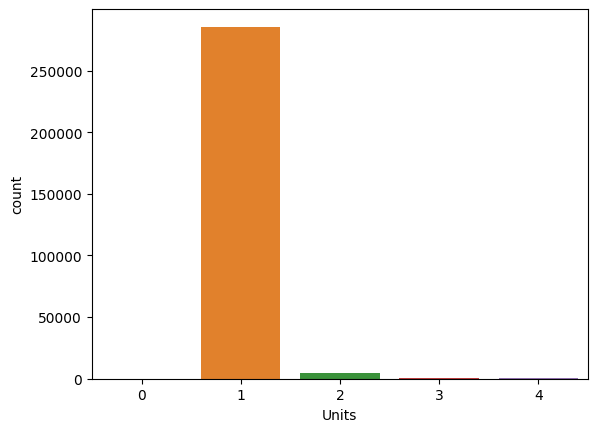

In [86]:
sns.countplot(data=data,x="Units")

<Axes: xlabel='Occupancy', ylabel='count'>

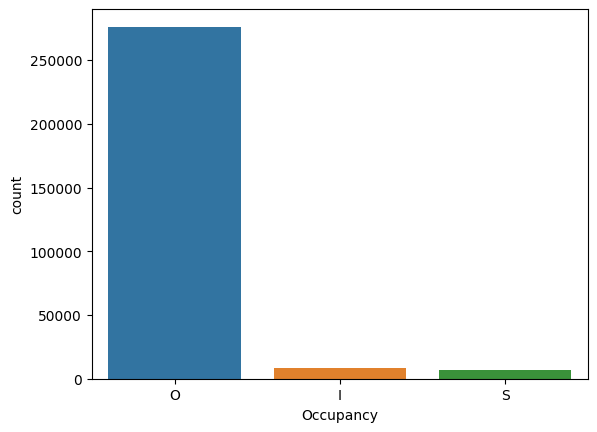

In [87]:
sns.countplot(data=data,x="Occupancy")

<ipython-input-88-8cdfe12c8553>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["OCLTV"])


<Axes: xlabel='OCLTV', ylabel='Density'>

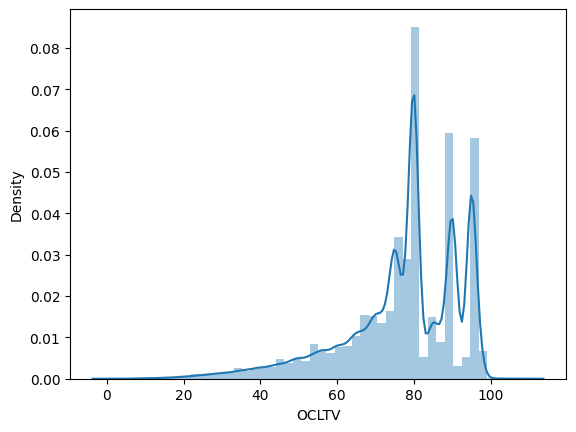

In [88]:
sns.distplot(data["OCLTV"])

<ipython-input-89-ae002e7d822c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["DTI"])


<Axes: xlabel='DTI', ylabel='Density'>

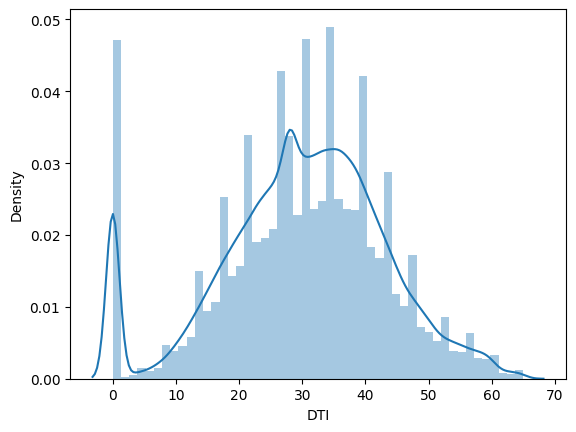

In [89]:
sns.distplot(data["DTI"])

<Axes: xlabel='OrigUPB', ylabel='Density'>

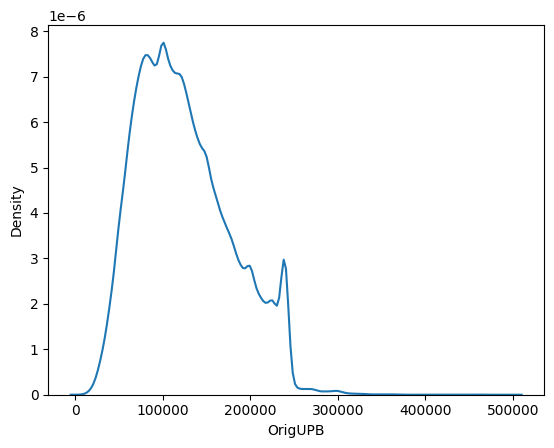

In [90]:
sns.kdeplot(data["OrigUPB"])

<Axes: >

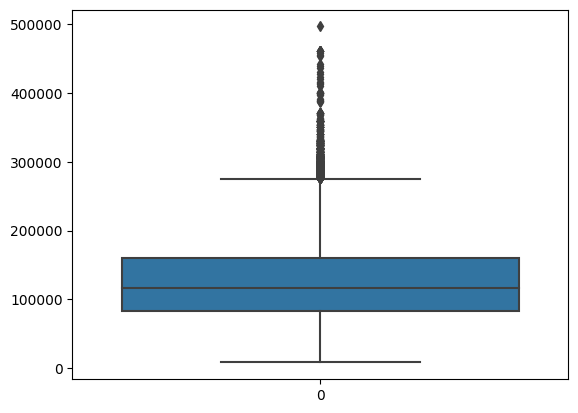

In [91]:
sns.boxplot(data["OrigUPB"])
#there are few people who took large amounts as loan

<Axes: ylabel='count'>

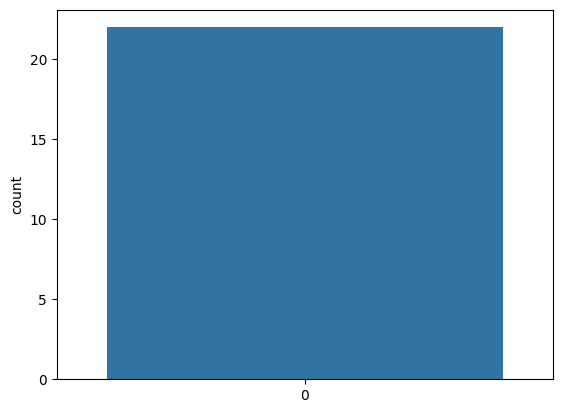

In [92]:
sns.countplot(data["DTI"][data["OrigUPB"]>400000])
#most of the people taking high loans have low DTI which is favourable

In [93]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

<Axes: xlabel='OrigInterestRate', ylabel='Count'>

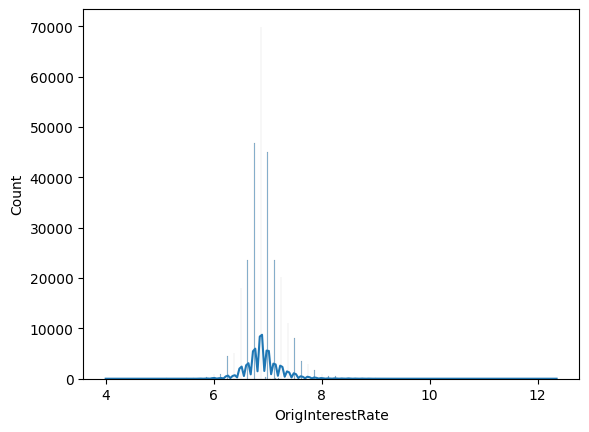

In [94]:
sns.histplot(data["OrigInterestRate"],kde=True)

<Axes: xlabel='Channel', ylabel='count'>

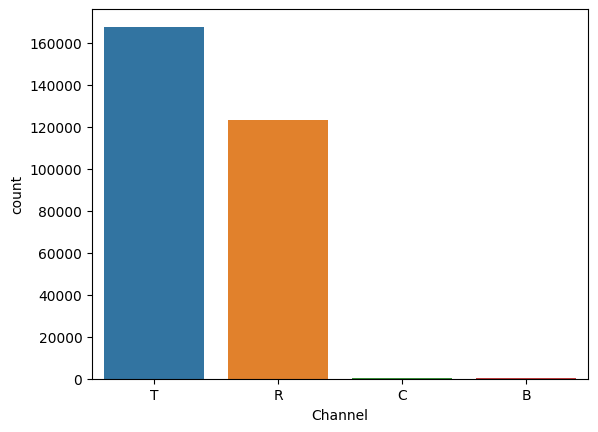

In [95]:
sns.countplot(data=data,x="Channel")

<Axes: xlabel='PPM', ylabel='count'>

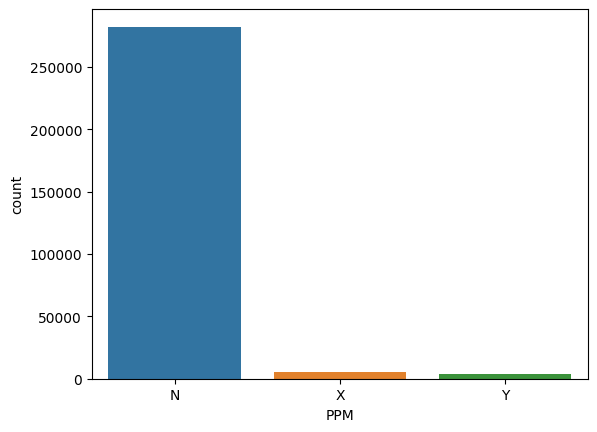

In [96]:
sns.countplot(x="PPM",data=data)
#lets preserve the fact that some values are not available

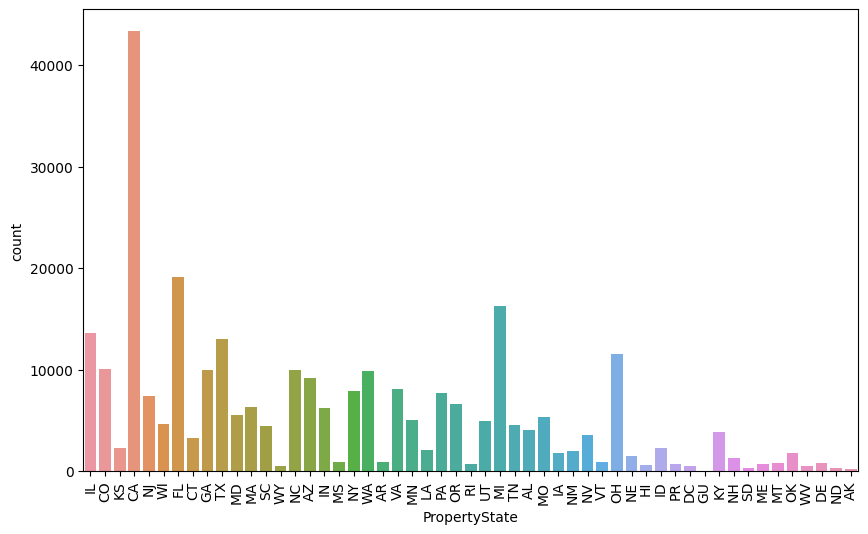

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x="PropertyState",data=data)
plt.xticks(rotation=90)
plt.show()
#CA most often

<Axes: xlabel='LoanPurpose', ylabel='count'>

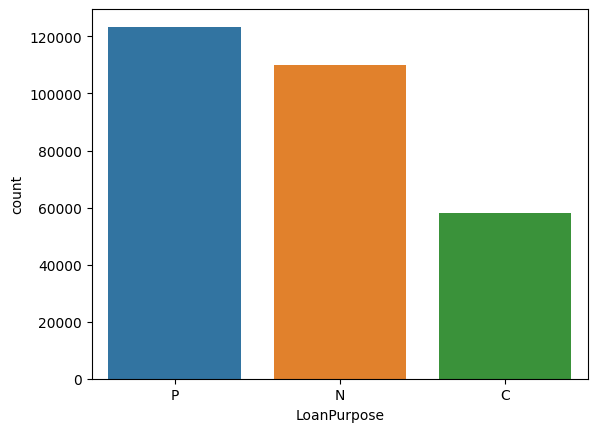

In [98]:
sns.countplot(x="LoanPurpose",data=data)

<Axes: xlabel='OrigLoanTerm', ylabel='Count'>

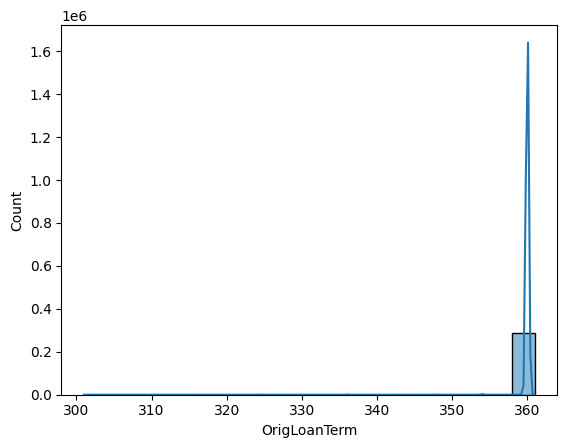

In [99]:
sns.histplot(x="OrigLoanTerm",data=data,kde=True)

In [100]:
data["OrigLoanTerm"].value_counts()
#most of the terms are around 360 months

360    289073
354       434
336       205
359       103
348        94
        ...  
301         6
302         5
304         4
303         4
361         2
Name: OrigLoanTerm, Length: 61, dtype: int64

<Axes: xlabel='NumBorrowers', ylabel='count'>

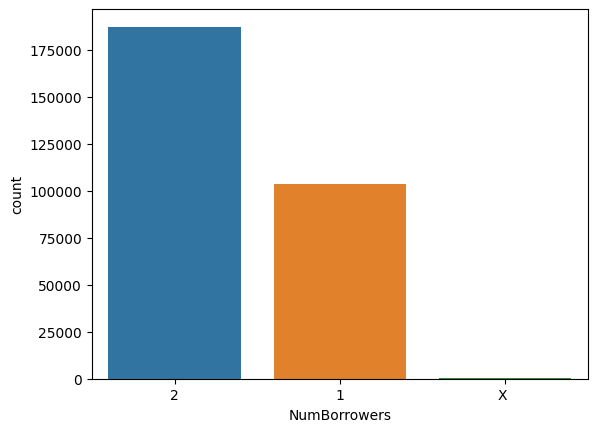

In [101]:
sns.countplot(x="NumBorrowers",data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'FL'),
  Text(1, 0, 'FT'),
  Text(2, 0, 'GM'),
  Text(3, 0, 'Ot'),
  Text(4, 0, 'RE'),
  Text(5, 0, 'NO'),
  Text(6, 0, 'ST'),
  Text(7, 0, 'CR'),
  Text(8, 0, 'CH'),
  Text(9, 0, 'FI'),
  Text(10, 0, 'HO'),
  Text(11, 0, 'PR'),
  Text(12, 0, 'Not Known'),
  Text(13, 0, 'PN'),
  Text(14, 0, 'WA'),
  Text(15, 0, 'BA'),
  Text(16, 0, 'G '),
  Text(17, 0, 'OL'),
  Text(18, 0, 'AC'),
  Text(19, 0, 'CO'),
  Text(20, 0, 'BI')])

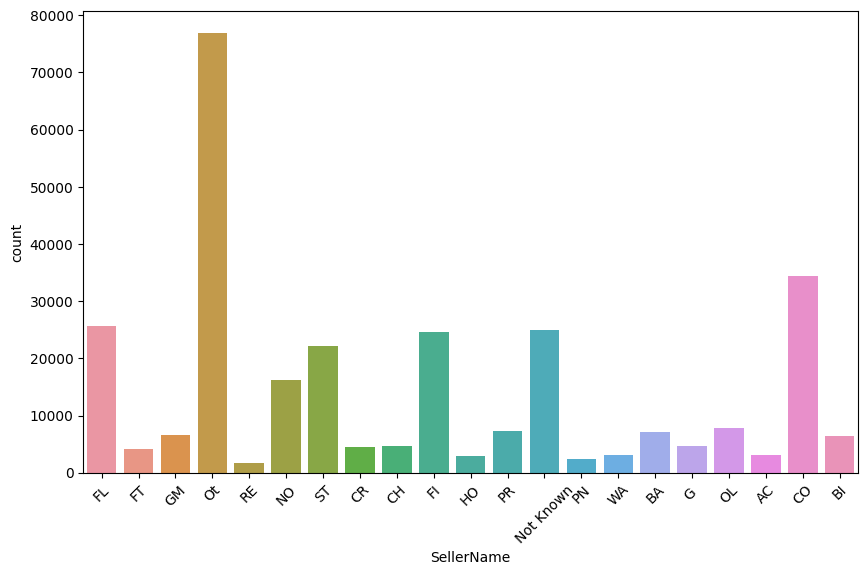

In [102]:
plt.figure(figsize=(10,6))
sns.countplot(x="SellerName",data=data)
plt.xticks(rotation=45)

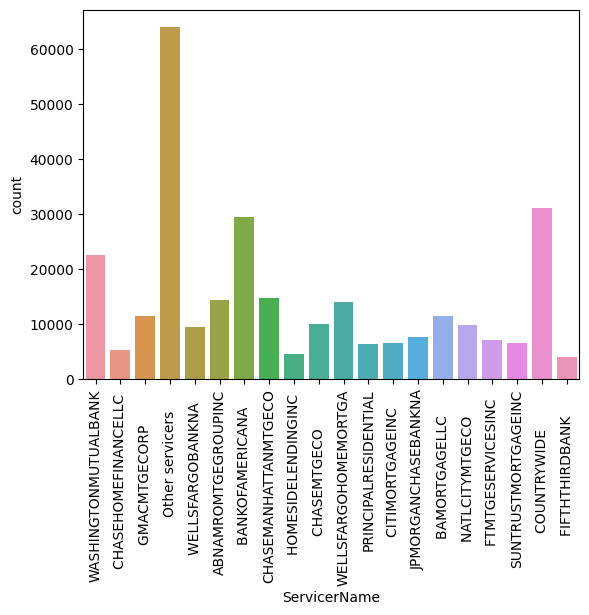

In [103]:
sns.countplot(x="ServicerName",data=data)
plt.xticks(rotation=90)
plt.show()

<ipython-input-104-51f0809b9c7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MonthsDelinquent"])


<Axes: xlabel='MonthsDelinquent', ylabel='Density'>

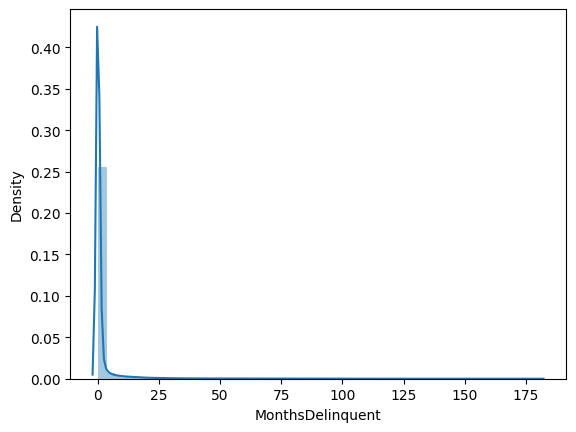

In [104]:
sns.distplot(data["MonthsDelinquent"])
#most of the customers are not delinquent -- less risky

<Axes: xlabel='MonthsInRepayment', ylabel='Count'>

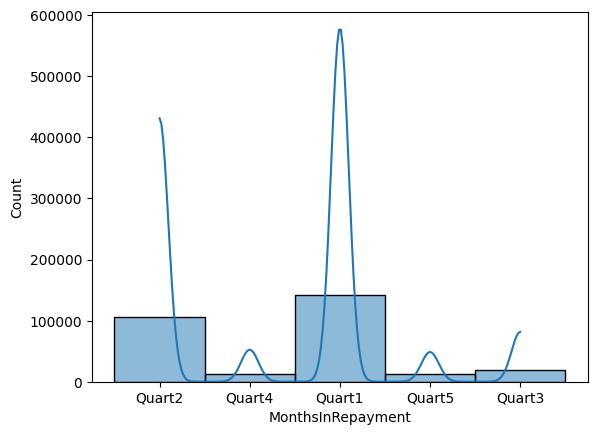

In [105]:
sns.histplot(data["MonthsInRepayment"],kde=True)

# **BIVARIATE ANALYSIS**

<ipython-input-106-2a981559c575>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

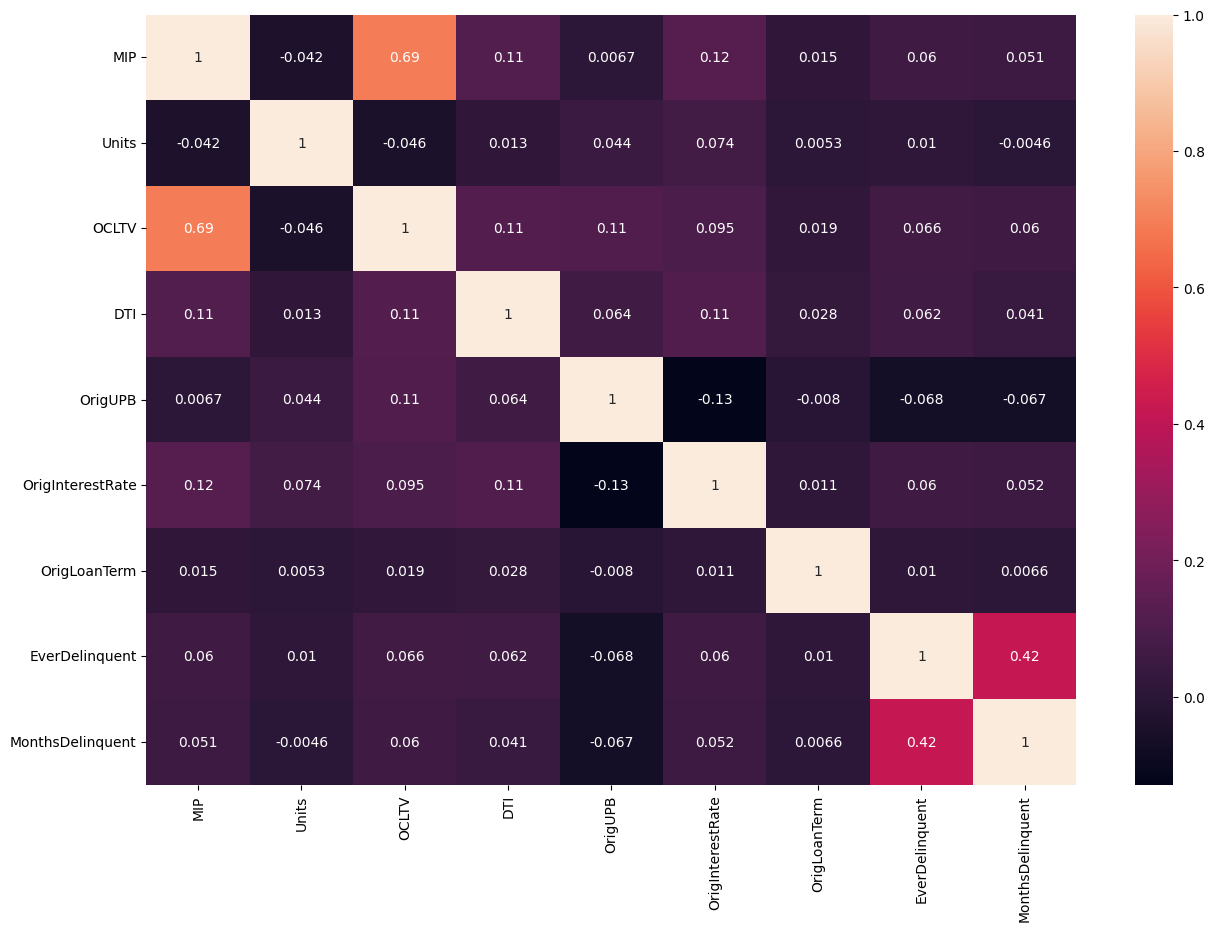

In [106]:
plt.figure(figsize=(15,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

In [107]:
#So, we can remove any one of the columns ocltv ir ltv
data.drop("OCLTV",axis=1,inplace=True)

In [108]:
data_encoded.drop("OCLTV",axis=1,inplace=True)

In [109]:
#sns.pairplot(data,diag_kind="kde")

In [110]:
data.dtypes

CreditScore              object
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                object
DTI                       int64
OrigUPB                   int64
LTV                      object
OrigInterestRate        float64
Channel                  object
PPM                      object
ProductType              object
PropertyState            object
PropertyType             object
PostalCode               object
LoanPurpose              object
OrigLoanTerm              int64
NumBorrowers             object
SellerName               object
ServicerName             object
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment        object
dtype: object

<Axes: xlabel='PropertyState', ylabel='count'>

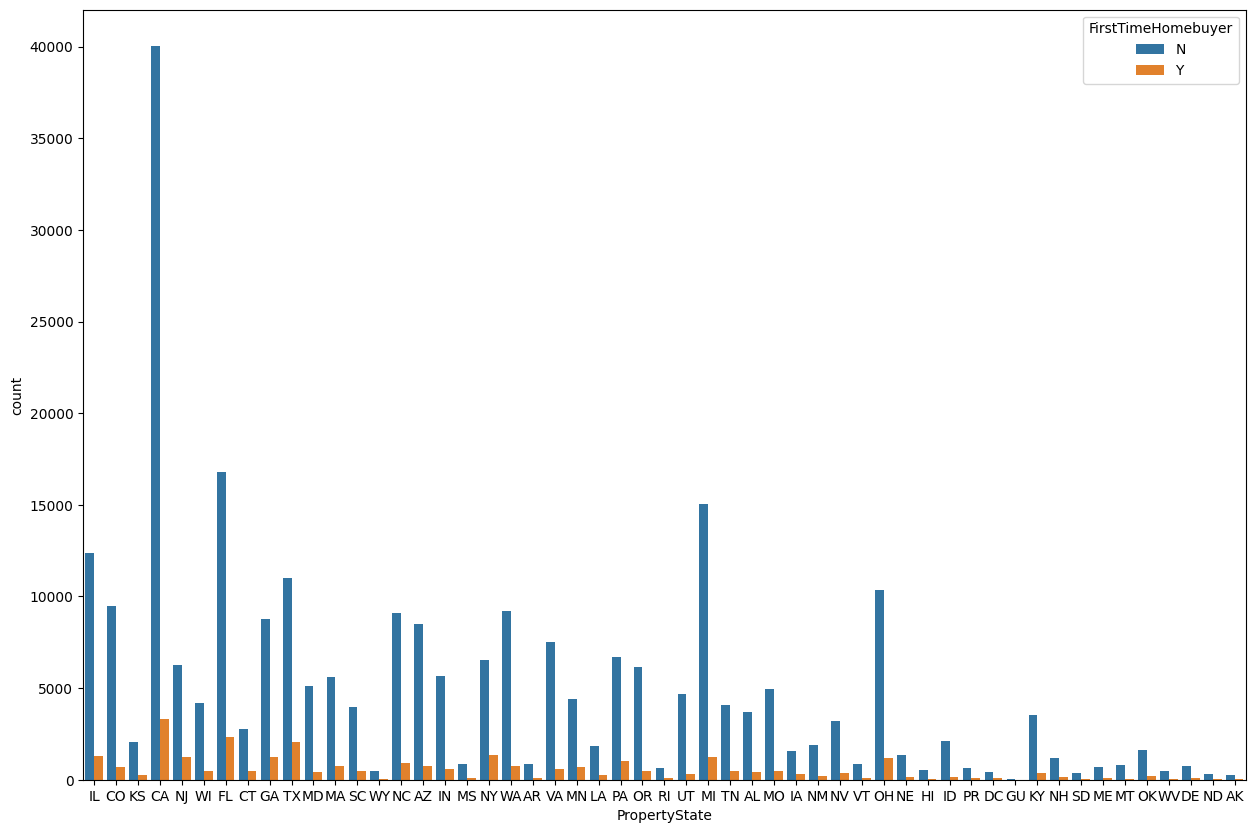

In [111]:
plt.figure(figsize=(15,10))
sns.countplot(x="PropertyState", hue="FirstTimeHomebuyer", data=data)

<Axes: xlabel='EverDelinquent', ylabel='count'>

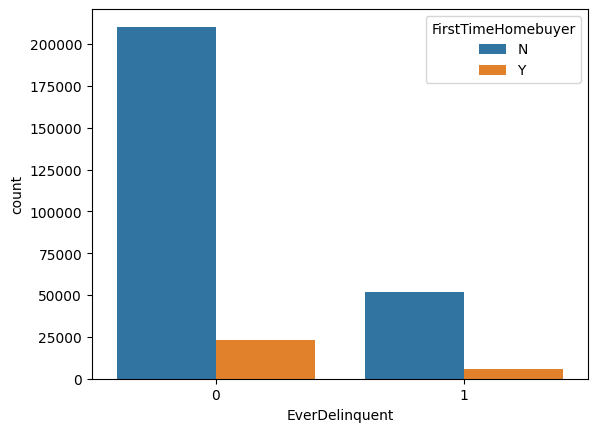

In [112]:
sns.countplot(x="EverDelinquent", hue="FirstTimeHomebuyer", data=data)

<Axes: xlabel='Units', ylabel='CreditScore'>

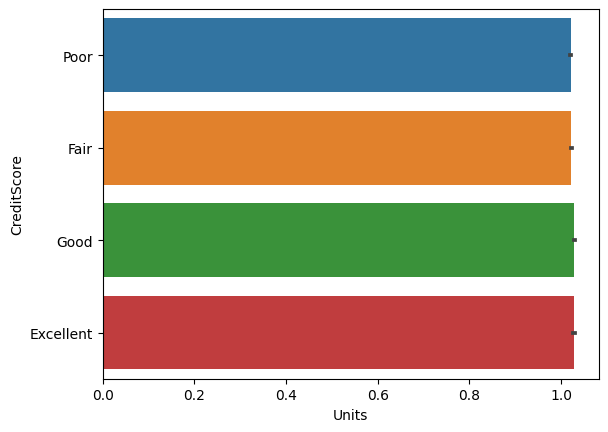

In [113]:
sns.barplot(x="Units",y="CreditScore",data=data)
#Credit score seems to be considerable foe all the units -- less risky

In [114]:
data["MaturityDate"].unique()

<PeriodArray>
['2029-01', '2027-10', '2029-02', '2024-09', '2027-02', '2029-03', '2026-02',
 '2026-07', '2029-04', '2026-09', '2029-05', '2029-06', '2029-07', '2029-08',
 '2029-09', '2029-10', '2029-11', '2029-12', '2030-03', '2030-04', '2028-04',
 '2030-08', '2026-11', '2028-03', '2027-04', '2025-08', '2030-06', '2030-02',
 '2025-09', '2027-03', '2025-07', '2025-11', '2027-06', '2025-02', '2027-05',
 '2026-12', '2027-01', '2025-04', '2030-01', '2026-10', '2026-01', '2026-06',
 '2026-08', '2030-10', '2027-12', '2028-09', '2027-08', '2025-10', '2025-03',
 '2028-08', '2027-09', '2027-07', '2028-06', '2028-02', '2026-05', '2028-11',
 '2026-04', '2024-10', '2031-01', '2028-05', '2030-12', '2030-05', '2024-05',
 '2028-10', '2033-08', '2030-09', '2024-06', '2030-07', '2026-03', '2028-07',
 '2028-12', '2025-06', '2025-01', '2027-11', '2032-11', '2031-11', '2025-12',
 '2031-06', '2024-02', '2031-05', '2024-11', '2028-01', '2033-12', '2025-05',
 '2024-08', '2031-04', '2041-11', '2024-07', '2043

In [115]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

<Axes: xlabel='PropertyType', ylabel='OrigLoanTerm'>

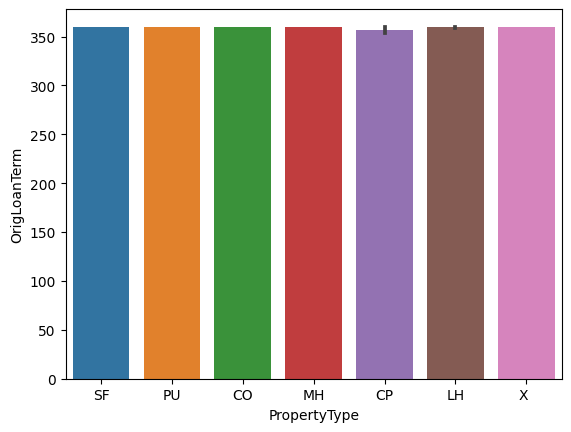

In [116]:
sns.barplot(x="PropertyType",y="OrigLoanTerm",data=data)
#original loan term is not varying much with property type

<Axes: xlabel='PropertyType', ylabel='OrigInterestRate'>

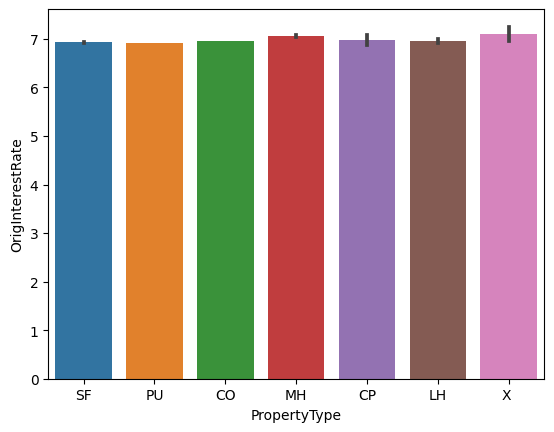

In [117]:
sns.barplot(x="PropertyType",y="OrigInterestRate",data=data)
#same with interest rate also

<Axes: xlabel='OrigInterestRate', ylabel='MonthsInRepayment'>

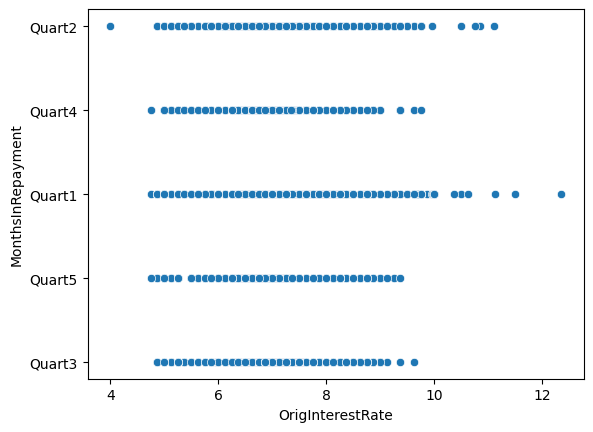

In [118]:
sns.scatterplot(data=data,y="MonthsInRepayment",x="OrigInterestRate")
#no relation

<Axes: xlabel='EverDelinquent', ylabel='CreditScore'>

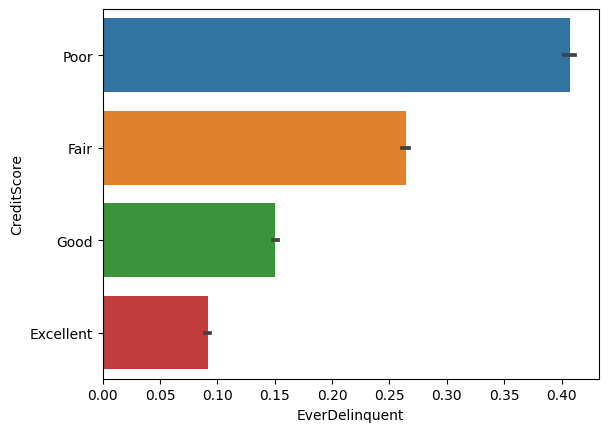

In [119]:
sns.barplot(x="EverDelinquent",y="CreditScore",data=data)
#Credit score of greater than 700 is favourable for banks giving loans

## **Feature Engineering**

**FEATURE SELECTION (UNIVARIATE SELECTION)**

In [120]:
data['MaturityDate'] = data['MaturityDate'].dt.to_timestamp()
data['FirstPaymentDate'] = data['FirstPaymentDate'].dt.to_timestamp()

In [121]:
data["MaturityDate"]

LoanSeqNum
F199Q1268030   2029-01-01
F199Q1015092   2029-01-01
F199Q1266886   2029-01-01
F199Q1178167   2029-01-01
F199Q1178517   2029-01-01
                  ...    
F199Q1220925   2029-02-01
F199Q1401332   2029-04-01
F199Q1401282   2029-04-01
F199Q1220924   2029-03-01
F199Q1220923   2029-02-01
Name: MaturityDate, Length: 291451, dtype: datetime64[ns]

In [122]:
data["FirstPaymentDate"]

LoanSeqNum
F199Q1268030   1999-02-01
F199Q1015092   1999-02-01
F199Q1266886   1999-02-01
F199Q1178167   1999-02-01
F199Q1178517   1999-02-01
                  ...    
F199Q1220925   1999-03-01
F199Q1401332   2002-10-01
F199Q1401282   2003-04-01
F199Q1220924   1999-04-01
F199Q1220923   1999-03-01
Name: FirstPaymentDate, Length: 291451, dtype: datetime64[ns]

In [123]:
data['loanTerm'] = (data['MaturityDate'] - data['FirstPaymentDate'])

In [124]:
data["loanTerm"]=((data["loanTerm"]/30.44).dt.days)+2

In [125]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'loanTerm'],
      dtype='object')

In [126]:
data.shape

(291451, 27)

In [127]:
(data["loanTerm"]<data["OrigLoanTerm"]).sum()

0

Original loan term is equal to loan term. So, we have origloanterm column so we dont need the columns maturity date and first payment date.

In [128]:
data_encoded.drop(["FirstPaymentDate","MaturityDate"],axis=1,inplace=True)

In [129]:
data_encoded.dtypes

CreditScore             int64
FirstTimeHomebuyer      int64
MSA                     int64
MIP                     int64
Units                   int64
Occupancy               int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
PropertyState           int64
PostalCode              int64
LoanPurpose             int64
OrigLoanTerm            int64
NumBorrowers            int64
SellerName              int64
ServicerName            int64
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
Channel_B               uint8
Channel_C               uint8
Channel_R               uint8
Channel_T               uint8
PPM_N                   uint8
PPM_X                   uint8
PPM_Y                   uint8
PropertyType_CO         uint8
PropertyType_CP         uint8
PropertyType_LH         uint8
PropertyType_MH         uint8
PropertyType_PU         uint8
PropertyType_SF         uint8
PropertyTy

In [130]:
data.dtypes

CreditScore                   object
FirstPaymentDate      datetime64[ns]
FirstTimeHomebuyer            object
MaturityDate          datetime64[ns]
MSA                           object
MIP                            int64
Units                          int64
Occupancy                     object
DTI                            int64
OrigUPB                        int64
LTV                           object
OrigInterestRate             float64
Channel                       object
PPM                           object
ProductType                   object
PropertyState                 object
PropertyType                  object
PostalCode                    object
LoanPurpose                   object
OrigLoanTerm                   int64
NumBorrowers                  object
SellerName                    object
ServicerName                  object
EverDelinquent                 int64
MonthsDelinquent               int64
MonthsInRepayment             object
loanTerm                       int64
d

In [131]:
data_encoded.shape

(291451, 34)

In [132]:
bestfeatures=SelectKBest(score_func=chi2,k=20)
y=data_encoded["EverDelinquent"]
x=data_encoded.drop("EverDelinquent",axis=1)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=["Specs","Score"]
sorted_scores = featureScores.sort_values(by="Score", ascending=False)
sorted_scores.reset_index(inplace=True,drop=True)
sorted_scores

,Specs,Score
0,OrigUPB,3.069602e+07
1,MonthsDelinquent,2.171561e+06
2,MonthsInRepayment,1.888162e+04
3,MIP,1.820773e+04
4,PostalCode,1.158417e+04
5,CreditScore,6.581625e+03
6,DTI,6.526476e+03
7,PropertyState,2.046185e+03
8,NumBorrowers,3.950497e+02
9,LTV,3.893096e+02


 we have got the scores and we'll drop the columns with score less than 1.812752e+01

In [133]:
data_encoded.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MSA', 'MIP', 'Units', 'Occupancy',
       'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PropertyState',
       'PostalCode', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'SellerName', 'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'Channel_B', 'Channel_C', 'Channel_R', 'Channel_T',
       'PPM_N', 'PPM_X', 'PPM_Y', 'PropertyType_CO', 'PropertyType_CP',
       'PropertyType_LH', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'PropertyType_X '],
      dtype='object')

In [134]:
#data_encoded.drop(["Channel_B","PPM_X","Channel_C","Occupancy","Units","FirstTimeHomebuyer","PPM_N","PropertyType_LH","OrigLoanTerm","PropertyType_CP","PropertyType_X "],axis=1,inplace=True)

In [135]:
data_encoded.shape

(291451, 34)

In [136]:
data_encoded.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,DTI,OrigUPB,LTV,OrigInterestRate,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,3,0,68,25,1,1,27,117000,0,6.750,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,3,0,95,0,1,1,17,109000,2,6.500,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,3,0,198,0,1,1,16,88000,2,6.875,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,3,0,210,0,1,1,14,160000,2,6.875,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,3,0,250,0,1,1,18,109000,2,7.125,...,1,0,0,0,0,0,0,0,1,0


BALANCING THE DATASET

In [137]:
data_encoded.shape

(291451, 34)

In [138]:
data_encoded["EverDelinquent"].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

UNDERSAMPLING AND OVERSAMPLING

In [139]:
X = data_encoded.drop("EverDelinquent",axis=1)
y = data_encoded["EverDelinquent"]

pipeline = Pipeline([
    ('undersample', RandomUnderSampler(sampling_strategy=0.5)),  # Undersample to 2:1 ratio
    ('oversample', SMOTE(sampling_strategy=1))  # Oversample to 1:1 ratio
])

# Apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Verify the new class distribution
print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())

Original class distribution: 0    233788
1     57663
Name: EverDelinquent, dtype: int64
Resampled class distribution: 0    115326
1    115326
Name: EverDelinquent, dtype: int64


In [140]:
sampled=pd.concat([X_resampled, y_resampled],axis=1)

In [141]:
sampled.shape

(230652, 34)

In [142]:
sampled.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,DTI,OrigUPB,LTV,OrigInterestRate,...,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X,EverDelinquent
0,1,0,391,30,1,1,34,63000,0,6.875,...,0,0,0,0,0,0,0,1,0,0
1,3,1,104,30,1,1,25,132000,0,6.750,...,0,0,0,0,0,0,0,1,0,0
2,1,0,129,0,1,1,36,64000,0,6.750,...,0,0,0,0,0,0,0,1,0,0
3,3,1,68,25,1,1,37,142000,0,7.000,...,0,0,0,0,0,0,0,1,0,0
4,2,0,262,0,1,1,20,100000,2,7.250,...,0,0,0,0,0,0,0,1,0,0


FEATURE SCALING

In [143]:
data_encoded.dtypes

CreditScore             int64
FirstTimeHomebuyer      int64
MSA                     int64
MIP                     int64
Units                   int64
Occupancy               int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
PropertyState           int64
PostalCode              int64
LoanPurpose             int64
OrigLoanTerm            int64
NumBorrowers            int64
SellerName              int64
ServicerName            int64
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
Channel_B               uint8
Channel_C               uint8
Channel_R               uint8
Channel_T               uint8
PPM_N                   uint8
PPM_X                   uint8
PPM_Y                   uint8
PropertyType_CO         uint8
PropertyType_CP         uint8
PropertyType_LH         uint8
PropertyType_MH         uint8
PropertyType_PU         uint8
PropertyType_SF         uint8
PropertyTy

In [144]:
data.dtypes

CreditScore                   object
FirstPaymentDate      datetime64[ns]
FirstTimeHomebuyer            object
MaturityDate          datetime64[ns]
MSA                           object
MIP                            int64
Units                          int64
Occupancy                     object
DTI                            int64
OrigUPB                        int64
LTV                           object
OrigInterestRate             float64
Channel                       object
PPM                           object
ProductType                   object
PropertyState                 object
PropertyType                  object
PostalCode                    object
LoanPurpose                   object
OrigLoanTerm                   int64
NumBorrowers                  object
SellerName                    object
ServicerName                  object
EverDelinquent                 int64
MonthsDelinquent               int64
MonthsInRepayment             object
loanTerm                       int64
d

In [145]:
data_encoded["MIP"].unique()

array([25,  0, 30, 12, 35, 29, 17, 18, 20, 22,  6, 14, 33, 16, 52, 36, 28,
       11, 45, 15, 27, 10, 32,  9, 50, 47,  7, 24, 37, 26,  1, 13, 21, 19,
       23, 55,  4])

In [146]:
scaler = MinMaxScaler()
data_encoded["MIP"] = scaler.fit_transform(data_encoded[["MIP"]])

In [147]:
data_encoded["DTI"].unique()

array([27, 17, 16, 14, 18, 40, 21, 20, 38, 19, 23, 45, 28, 29, 15, 43, 25,
       24, 26, 35, 46, 39, 33, 48, 30, 31, 22, 56, 32, 12,  6, 37, 36, 42,
       34, 11, 41,  8, 44, 55,  0, 13, 53, 10,  9, 51,  7, 47, 65, 54,  2,
       57,  5,  3,  4, 50, 59, 49, 52, 64, 60, 58, 62,  1, 61, 63])

In [148]:
data_encoded["DTI"] = scaler.fit_transform(data_encoded[["DTI"]])

In [149]:
data_encoded["OrigUPB"]=scaler.fit_transform(data_encoded[["OrigUPB"]])

In [150]:
data_encoded["OrigInterestRate"]=scaler.fit_transform(data_encoded[["OrigInterestRate"]])

In [151]:
data_encoded["SellerName"].unique()

array([ 7,  8, 10, 15, 18, 12, 19,  5,  3,  6, 11, 17, 13, 16, 20,  1,  9,
       14,  0,  4,  2])

In [152]:
data_encoded["MonthsDelinquent"]=scaler.fit_transform(data_encoded[["MonthsDelinquent"]])

In [153]:
data_encoded.dtypes

CreditScore             int64
FirstTimeHomebuyer      int64
MSA                     int64
MIP                   float64
Units                   int64
Occupancy               int64
DTI                   float64
OrigUPB               float64
LTV                     int64
OrigInterestRate      float64
PropertyState           int64
PostalCode              int64
LoanPurpose             int64
OrigLoanTerm            int64
NumBorrowers            int64
SellerName              int64
ServicerName            int64
EverDelinquent          int64
MonthsDelinquent      float64
MonthsInRepayment       int64
Channel_B               uint8
Channel_C               uint8
Channel_R               uint8
Channel_T               uint8
PPM_N                   uint8
PPM_X                   uint8
PPM_Y                   uint8
PropertyType_CO         uint8
PropertyType_CP         uint8
PropertyType_LH         uint8
PropertyType_MH         uint8
PropertyType_PU         uint8
PropertyType_SF         uint8
PropertyTy

In [154]:
data_encoded.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,DTI,OrigUPB,LTV,OrigInterestRate,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,3,0,68,0.454545,1,1,0.415385,0.222904,0,0.329341,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,3,0,95,0.000000,1,1,0.261538,0.206544,2,0.299401,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,3,0,198,0.000000,1,1,0.246154,0.163599,2,0.344311,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,3,0,210,0.000000,1,1,0.215385,0.310838,2,0.344311,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,3,0,250,0.000000,1,1,0.276923,0.206544,2,0.374251,...,1,0,0,0,0,0,0,0,1,0


## Feature Extraction with PCA

In [155]:
pca = PCA()
pca.fit(data_encoded)
pcs = pca.components_
print(pcs)

[[ 3.00859664e-05  4.49379922e-05 -6.85378079e-02 ... -3.47989169e-05
   6.89986629e-06  3.28719119e-08]
 [ 6.79624781e-05  5.68514760e-05 -9.97609425e-01 ...  8.07101039e-05
  -8.55077061e-05  2.77226260e-07]
 [ 1.38769452e-03  3.23032715e-04 -8.75775730e-03 ... -9.03828252e-04
   1.68906467e-03 -1.92036939e-07]
 ...
 [ 0.00000000e+00 -2.46157066e-15  1.21068060e-18 ...  2.57115247e-01
   2.57115247e-01  2.57115247e-01]
 [-0.00000000e+00 -1.17838953e-16 -3.30568931e-19 ...  2.76558358e-01
   2.76558358e-01  2.76558358e-01]
 [ 0.00000000e+00  7.22264225e-17 -3.29389796e-19 ... -1.62593860e-02
  -1.62593860e-02 -1.62593860e-02]]


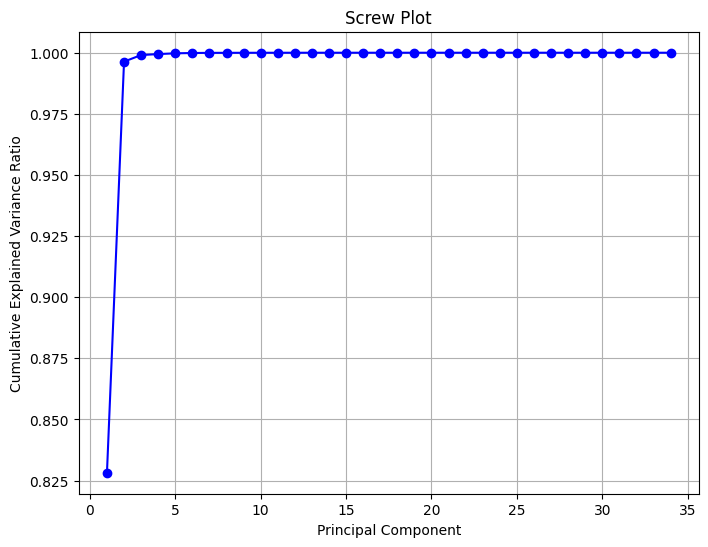

In [156]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Screw Plot')
plt.grid(True)
plt.show()

In [157]:
cumulative_variance_ratio

array([0.82820527, 0.99635664, 0.99904592, 0.9994381 , 0.99975938,
       0.99988709, 0.99994652, 0.99995974, 0.99997152, 0.9999821 ,
       0.99998742, 0.99999169, 0.99999389, 0.99999553, 0.99999642,
       0.99999725, 0.9999979 , 0.99999842, 0.99999887, 0.99999927,
       0.99999959, 0.99999976, 0.99999988, 0.99999992, 0.99999994,
       0.99999997, 0.99999998, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

We can consider 3 to 4 pcs in minimum

In [158]:
data_encoded.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,DTI,OrigUPB,LTV,OrigInterestRate,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,3,0,68,0.454545,1,1,0.415385,0.222904,0,0.329341,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,3,0,95,0.000000,1,1,0.261538,0.206544,2,0.299401,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,3,0,198,0.000000,1,1,0.246154,0.163599,2,0.344311,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,3,0,210,0.000000,1,1,0.215385,0.310838,2,0.344311,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,3,0,250,0.000000,1,1,0.276923,0.206544,2,0.374251,...,1,0,0,0,0,0,0,0,1,0


In [159]:
sampled["EverDelinquent"].value_counts()

0    115326
1    115326
Name: EverDelinquent, dtype: int64

In [160]:
#splitting into train and test data sets
y=sampled["EverDelinquent"]
x=sampled.drop("EverDelinquent",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [161]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7163729379376125
Confusion Matrix:
 [[23006     0]
 [13084 10041]]


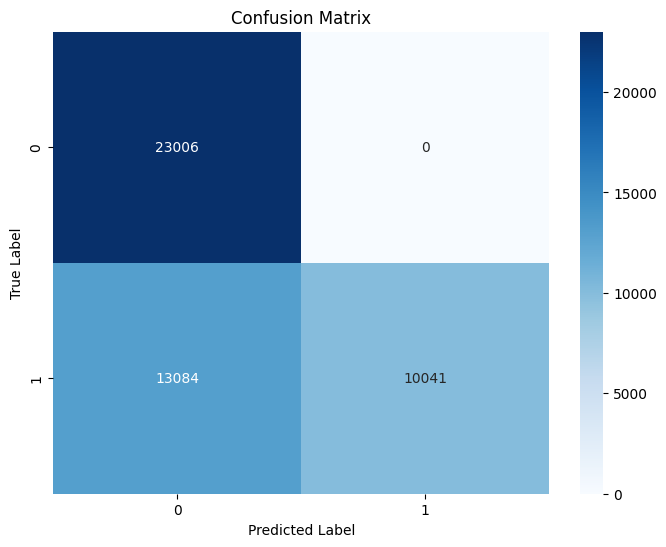

In [162]:
classes = np.unique(np.concatenate((y_test, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
data.corr()
#draw the correlation matrix to see the relationship between variables

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-68-a8adab38177f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PropertyState,PropertyType,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,-0.164376,0.002808,-0.190848,-0.098740,0.003770,-0.191080,-0.119472,0.007633,-0.015376,-0.036478,-0.008075,-0.207204,-0.150266,-0.005127
MIP,-0.164376,1.000000,-0.042111,0.694789,0.111603,0.006729,0.695888,0.124544,-0.035503,0.041089,-0.020029,0.014834,0.059993,0.051204,-0.087802
Units,0.002808,-0.042111,1.000000,-0.046133,0.012887,0.043827,-0.046032,0.074070,0.002283,-0.003694,0.041389,0.005348,0.010163,-0.004573,0.025594
OCLTV,-0.190848,0.694789,-0.046133,1.000000,0.114853,0.106273,0.999470,0.095268,-0.013396,0.067254,-0.015142,0.018560,0.065528,0.059811,-0.094299
DTI,-0.098740,0.111603,0.012887,0.114853,1.000000,0.063640,0.114468,0.105216,-0.040499,-0.025587,0.019310,0.028005,0.062109,0.040830,-0.007732
OrigUPB,0.003770,0.006729,0.043827,0.106273,0.063640,1.000000,0.105722,-0.128563,0.087512,-0.100278,0.069608,-0.008008,-0.067605,-0.067243,-0.211698
LTV,-0.191080,0.695888,-0.046032,0.999470,0.114468,0.105722,1.000000,0.095520,-0.012719,0.067133,-0.014711,0.018477,0.065735,0.059930,-0.094596
OrigInterestRate,-0.119472,0.124544,0.074070,0.095268,0.105216,-0.128563,0.095520,1.000000,0.008016,-0.040651,-0.022287,0.010794,0.060418,0.051706,-0.120378
Channel,0.007633,-0.035503,0.002283,-0.013396,-0.040499,0.087512,-0.012719,0.008016,1.000000,-0.021095,0.027983,0.067065,0.022736,0.008103,-0.048855
PropertyState,-0.015376,0.041089,-0.003694,0.067254,-0.025587,-0.100278,0.067133,-0.040651,-0.021095,1.000000,0.056241,-0.015744,0.025433,0.037338,0.063097


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-56-57c0843492a0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


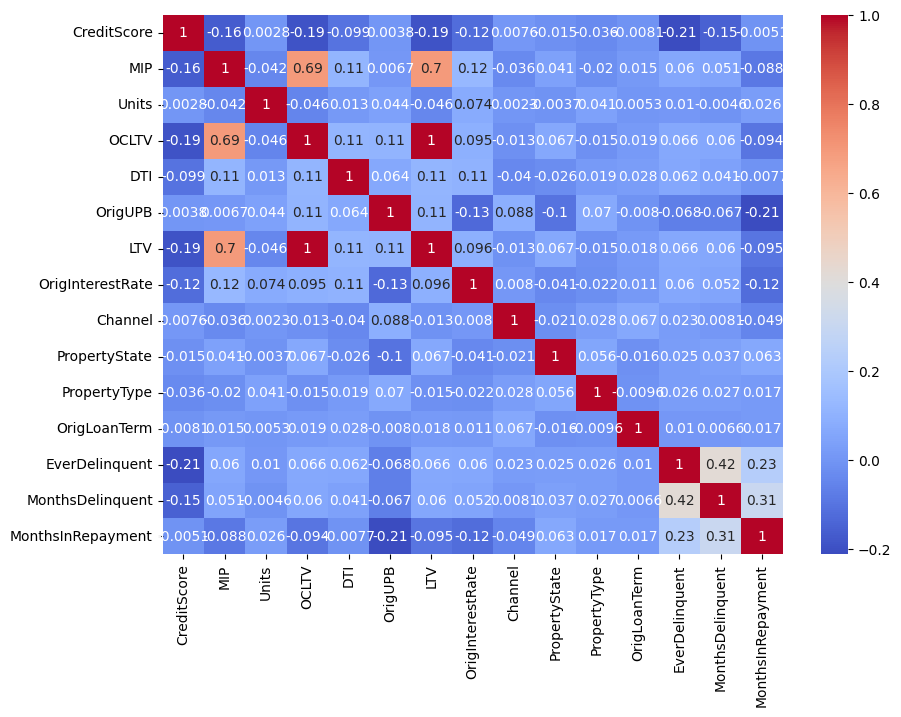

In [ ]:
#sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
#show the correlation between data's features using heat map


# Generate correlation matrix
corr_matrix = data.corr()

# Set figure size
plt.figure(figsize=(10,7))

# Create heatmap with correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show plot
plt.show()


## Handling Outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

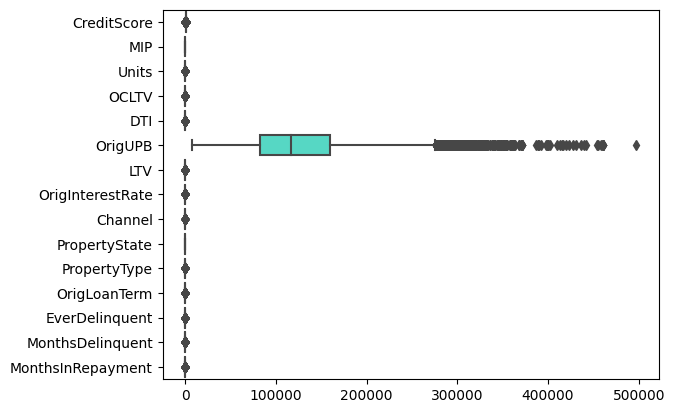

In [ ]:
sns.boxplot(data=data,palette='rainbow',orient='h')
#box plot to all features to show outliers

In [ ]:
#view individual boxplots to visualise outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


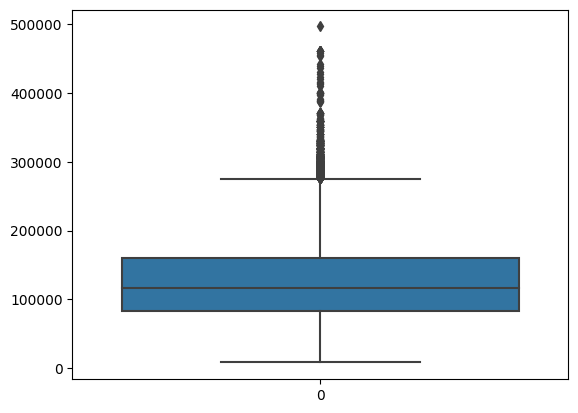

In [ ]:
draw_boxplot('OrigUPB')

In [ ]:
#drop outliers
upp,low=handle_outlier(data['OrigUPB'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['OrigUPB']=np.where(data['OrigUPB']>upp,upp,data['OrigUPB'])
data['OrigUPB']=np.where(data['OrigUPB']<low,low,data['OrigUPB'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


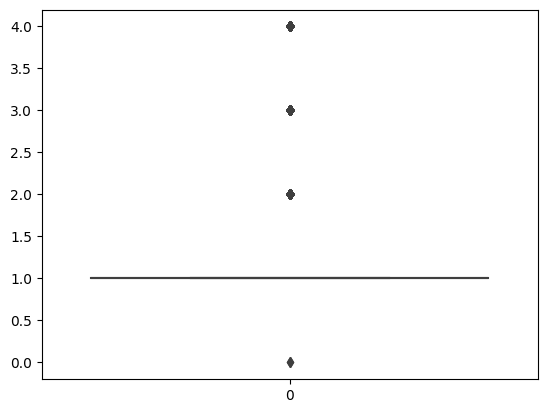

In [ ]:
draw_boxplot('Units')

In [ ]:
data['Units']=np.where(data['Units']>upper,upper,data['Units'])
data['Units']=np.where(data['Units']<lower,lower,data['Units'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


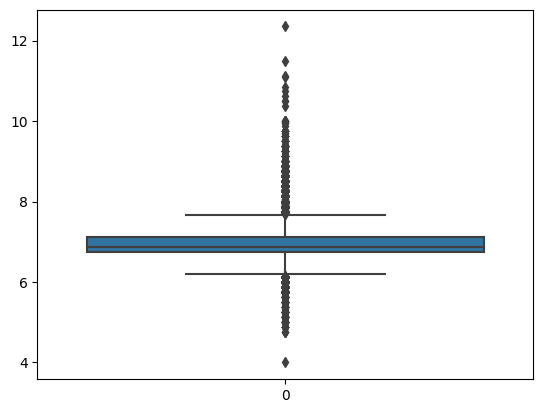

In [ ]:
draw_boxplot('OrigInterestRate')

In [ ]:
uppero,lowero=handle_outlier(data['OrigInterestRate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['OrigInterestRate']=np.where(data['OrigInterestRate']>uppero,uppero,data['OrigInterestRate'])
data['OrigInterestRate']=np.where(data['OrigInterestRate']<lowero,lowero,data['OrigInterestRate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#checking for duplicates values to drop them
duplicate=data.duplicated()
print(duplicate.sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


65


In [ ]:
data=data.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
duplicate=data.duplicated()
print(duplicate.sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0


## **Data Visualisation**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

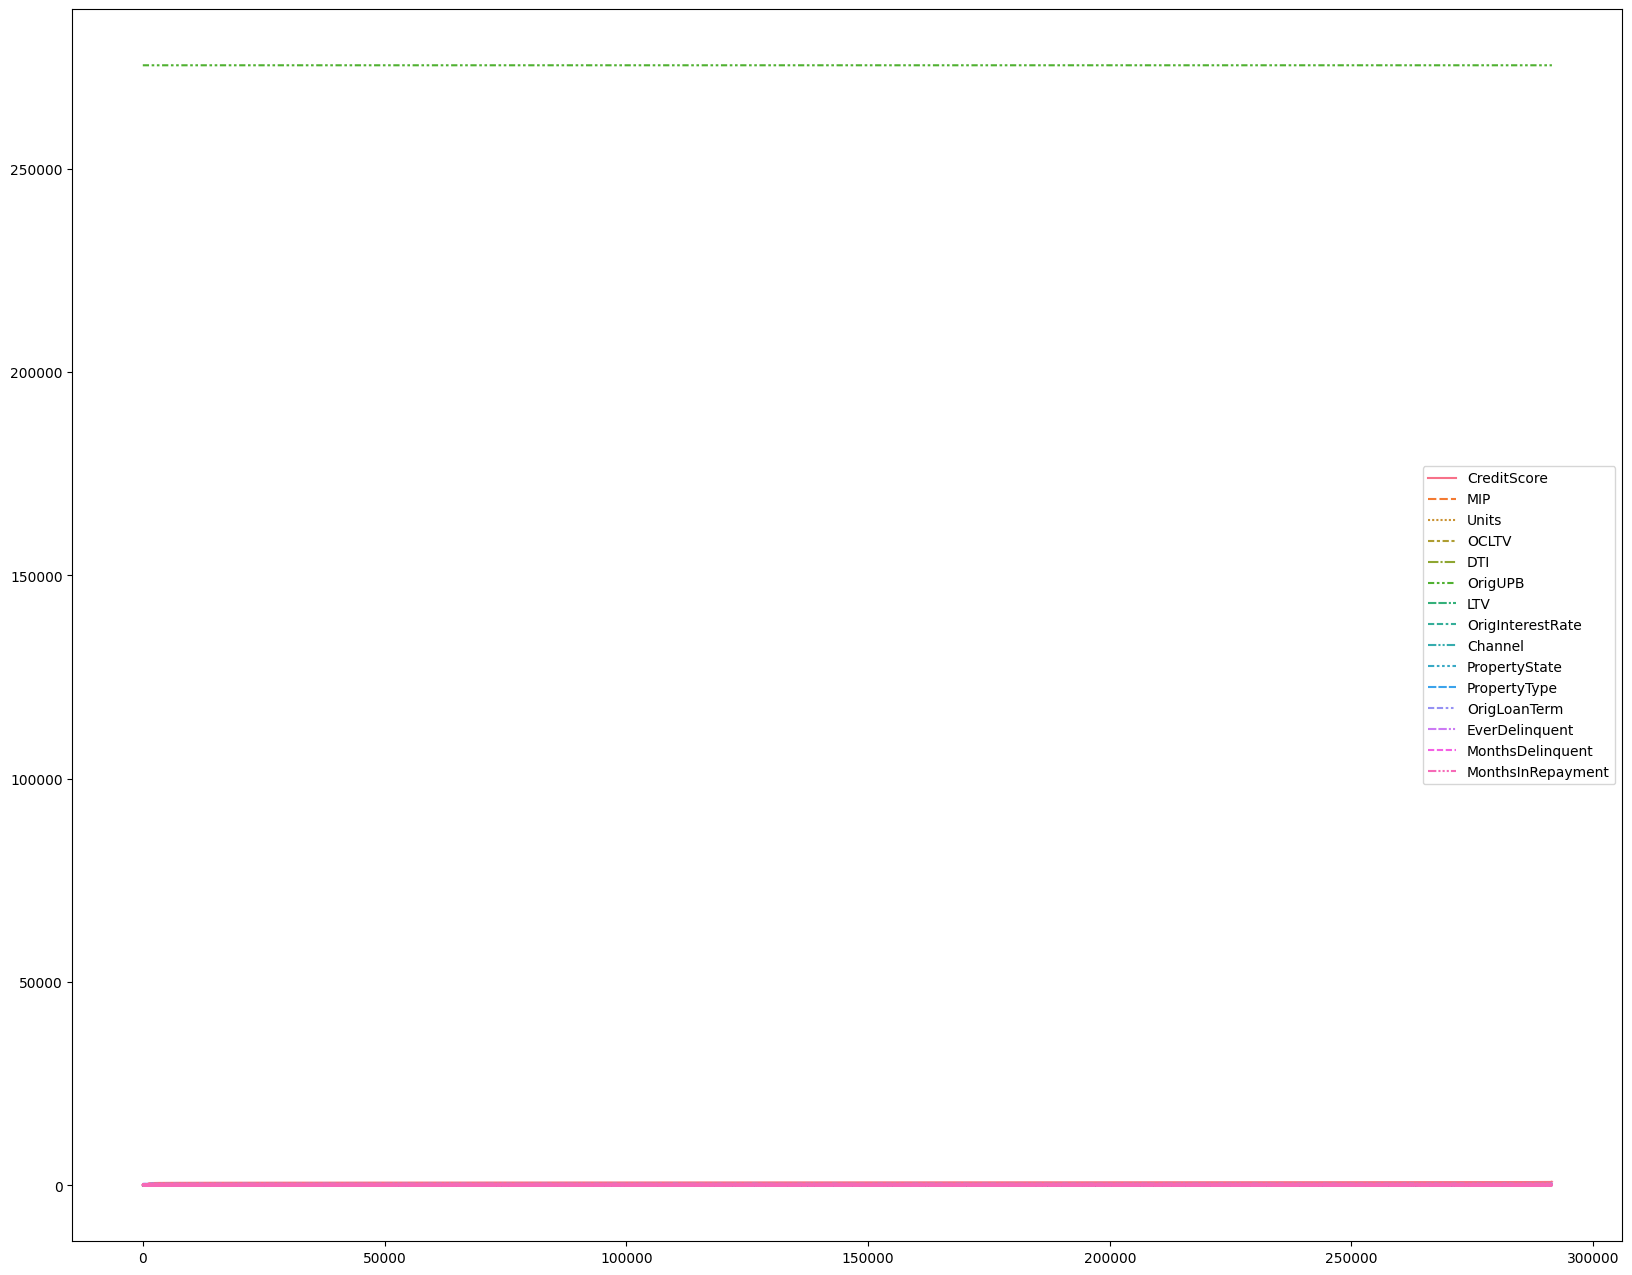

In [ ]:
plt.figure(figsize=(20,16))
sns.lineplot(data=data)